In [1]:
# use pip install pysd and matplotlib to install necessary packages
import pysd
import matplotlib.pyplot as plt
model = pysd.read_vensim('cpr.mdl')

In [2]:
#Note that this is a one-shot run compared to the iterative decision-making conducted throughout the experiments using multiple agents. 
#The purpose of this code is to show the model's different modes of behavior for those who do not access to commercial modeling software.

#Change the ‘Decision’ parameter below. Values between -100 and 100 were allowed during the experiment.
#Change the ‘Treatment Delay’ parameter below. In this study, we used either 1 or 4-year delay for the orchard growth.

stocks =model.run(params={'Decision': 10, 'Treatment Delay':1})
stocks

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Effect of Groundwater on Pumping,Maximum Groundwater Effect on Pumping,Groundwater Ratio,Initial Groundwater,Minimum Groundwater Effect on Pumping,Pumping,...,Water Cost,Water Cost Growth Rate,Water Cost Inflection,Y1ToY2,Water Cost Slope,Water Required,Water Required YO,Y3ToO,Y2ToY3,Young Orchards 3
time,,,,,,,,,,,,,,,,,,,,,
1.000,30,1,0.125,0.125,1.000000,1,1.000000,400,0,10.000000,...,16.234756,3,0.75,5.000010,1,0.1,0.05,5.000010,5.000010,1.666670
1.125,30,1,0.125,0.125,1.000000,1,1.000000,400,0,10.000000,...,16.284253,3,0.75,6.875006,1,0.1,0.05,5.000010,5.000010,1.666670
1.250,30,1,0.125,0.125,0.999997,1,0.999997,400,0,9.999974,...,16.333705,3,0.75,8.046879,1,0.1,0.05,5.000010,5.703134,1.666670
1.375,30,1,0.125,0.125,0.999992,1,0.999992,400,0,9.999920,...,16.383349,3,0.75,8.779299,1,0.1,0.05,5.263681,6.582038,1.754560
1.500,30,1,0.125,0.125,0.999984,1,0.999984,400,0,10.003136,...,16.436000,3,0.75,9.237062,1,0.1,0.05,5.758065,7.406011,1.919355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.500,30,1,0.125,0.125,0.883741,1,0.883741,400,0,15.449400,...,614.813197,3,0.75,10.000000,1,0.1,0.05,10.000000,10.000000,3.333333
29.625,30,1,0.125,0.125,0.881982,1,0.881982,400,0,15.432534,...,625.968031,3,0.75,10.000000,1,0.1,0.05,10.000000,10.000000,3.333333
29.750,30,1,0.125,0.125,0.880229,1,0.880229,400,0,15.415623,...,637.274379,3,0.75,10.000000,1,0.1,0.05,10.000000,10.000000,3.333333


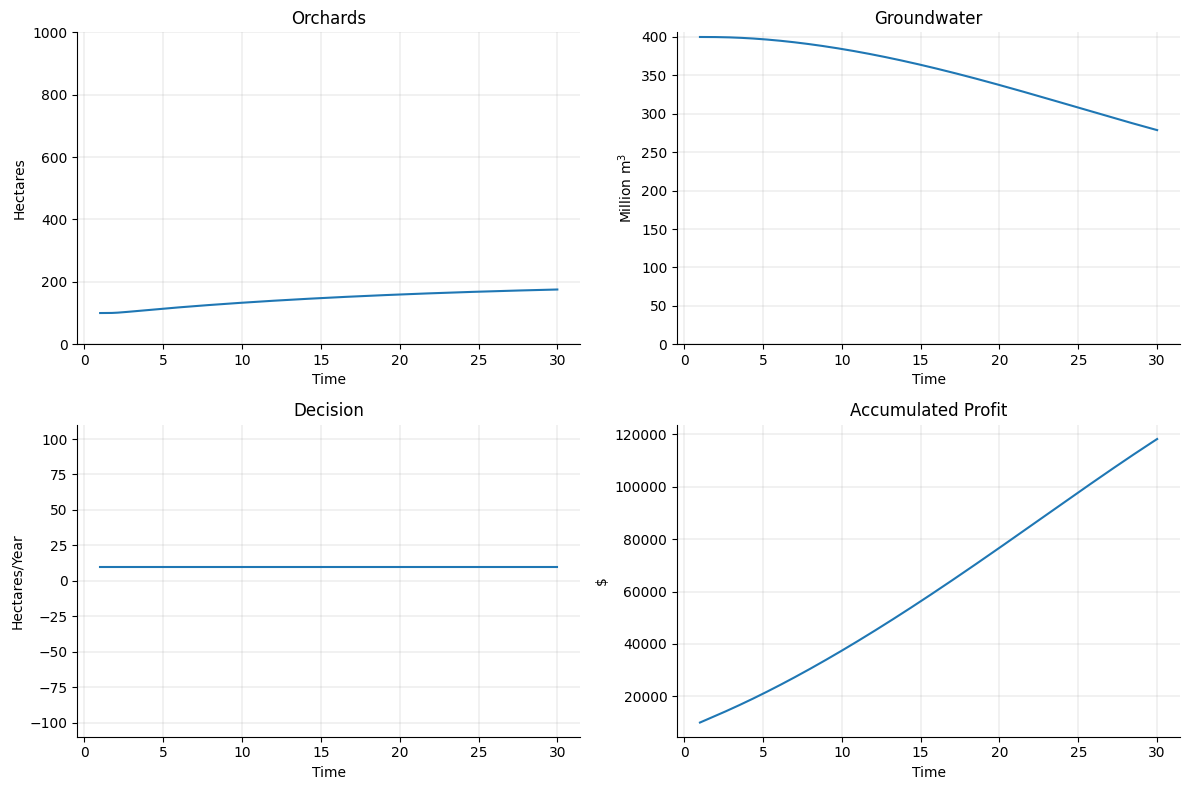

In [3]:
import matplotlib.pyplot as plt

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Orchards (top-left)
stocks["Orchards"].plot(ax=axes[0, 0])
axes[0, 0].set_title("Orchards")
axes[0, 0].set_ylabel("Hectares")
axes[0, 0].set_xlabel("Time")
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].grid(True, linewidth=0.35, alpha=0.7)
axes[0, 0].set_ylim(0, 1000)

# Plot Groundwater (top-right)
stocks["Groundwater"].plot(ax=axes[0, 1])
axes[0, 1].set_title("Groundwater")
axes[0, 1].set_ylabel("Million m$^3$")
axes[0, 1].set_xlabel("Time")
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].grid(True, linewidth=0.35, alpha=0.7)
axes[0, 1].set_ylim(0, )

# Plot Decision (bottom-left)
stocks["Decision"].plot(ax=axes[1, 0])
axes[1, 0].set_title("Decision")
axes[1, 0].set_ylabel("Hectares/Year")
axes[1, 0].set_xlabel("Time")
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].grid(True, linewidth=0.35, alpha=0.7)
axes[1, 0].set_ylim(-110, 110)

# Plot Profit (bottom-right)
stocks["Profit"].plot(ax=axes[1, 1])
axes[1, 1].set_title("Accumulated Profit")
axes[1, 1].set_ylabel("$")
axes[1, 1].set_xlabel("Time")
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].grid(True, linewidth=0.35, alpha=0.7)
#axes[1, 1].set_ylim(-300000, 100000)

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Save as SVG in the same location as the notebook
plt.savefig("plots.svg", format='svg')

# Display the plot
plt.show()
